<a href="https://colab.research.google.com/github/ciertou/handsonllms/blob/main/nlp_with_pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("helloworld!")

helloworld!


<Axes: >

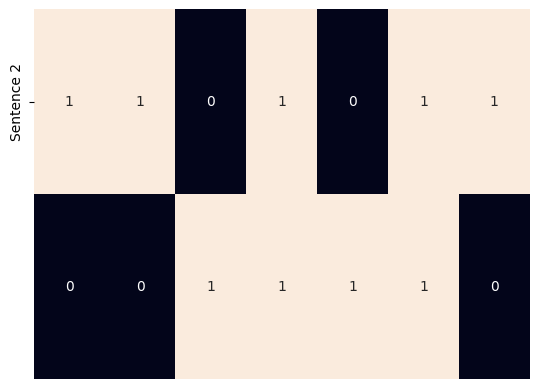

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
corpus = ['Time flies flies like an arrow.',
'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels="", yticklabels=['Sentence 2'])

In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [1]:
%%capture
!pip instanll accelerate

In [ ]:
def describe(x):
  print("Type: {}".format(x.type()))
  print("Shape/size: {}".format(x.shape))
  print("Values: \n{}".format(x))

In [ ]:
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1.9807e-40, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4013e-45, 0.0000e+00]])


In [ ]:
describe(torch.rand(2, 3)) # uniform random
describe(torch.randn(2, 3)) # random normal

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.2084, 0.8405, 0.4043],
        [0.4505, 0.4764, 0.7647]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 1.0394,  0.1846, -0.9424],
        [-0.3562, -1.3676, -1.1783]])


In [ ]:
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [ ]:
import torch
import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.2663, 0.6363, 0.3657],
        [0.6937, 0.7984, 0.2945]], dtype=torch.float64)


In [ ]:
x = torch.FloatTensor([[1, 2, 3],
[4, 5, 6]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
x = x.long()
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
x = torch.tensor([[1, 2, 3],
[4, 5, 6]], dtype=torch.int64)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
x = x.int()

In [ ]:
describe(x)

Type: torch.IntTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [ ]:
import torch
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])


In [ ]:
x = x.view(2, 3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
describe(torch.sum(x, dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])


In [ ]:
describe(torch.transpose(x, 0, 1))

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [ ]:
import torch
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [ ]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [ ]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0
False


In [ ]:
# preferred method: device agnostic tensor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else
"cpu")
print (device)

cuda


In [ ]:
torch.cuda.is_available()

True

In [ ]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.6350, 0.2195, 0.7436],
        [0.0536, 0.6821, 0.6641],
        [0.3055, 0.3658, 0.4098]], device='cuda:0')


In [ ]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.4072, 0.7304, 0.0807],
        [0.9195, 0.1656, 0.6500],
        [0.7293, 0.2576, 0.1474]], device='cuda:0')


In [ ]:
y = torch.rand(3, 3).to(device)
x + y

tensor([[0.7090, 0.9027, 0.1940],
        [1.1872, 0.3921, 1.5405],
        [1.4116, 1.1647, 0.6221]], device='cuda:0')

In [ ]:
import os

print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))

CUDA_VISIBLE_DEVICES: 0


In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # or any desired GPU index


In [ ]:
def n_grams(text, n):
  '''
  takes tokens or text, returns a list of n-grams
  '''
  return [text[i:i+n] for i in range(len(text)-n+1)]
cleaned = ['mary', ',', "n't", 'slap', 'green', 'witch', '.']
print(n_grams(cleaned, 3))

[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]


In [ ]:
import torch.nn as nn
import torch
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-0.8687, -0.5100,  0.9819]])
tensor([[0.1137, 0.1628, 0.7235]])
tensor([1.])


In [ ]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0],
dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.5340],
        [0.5588],
        [0.7411],
        [0.5975]], grad_fn=<SigmoidBackward0>)
tensor(0.6639, grad_fn=<BinaryCrossEntropyBackward0>)


In [4]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""
print(text)

Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee.


In [5]:
from transformers import pipeline
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [6]:
import pandas as pd
outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


In [11]:
outputs[0]['score']

0.9015459418296814

In [12]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556569,Mega,208,212
4,PER,0.590257,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775361,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


In [13]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


In [14]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1640: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


In [15]:
translator = pipeline("translation_en_to_de",
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.
